# Facebook Kaggle Competition

## Problem Statement
    The goal of this competition is to predict which place a person would like to check in to. For the purposes of this competition, Facebook created an artificial world consisting of more than 100,000 places located in a 10 km by 10 km square. For a given set of coordinates, your task is to return a ranked list of the most likely places. Data was fabricated to resemble location signals coming from mobile devices, giving you a flavor of what it takes to work with real data complicated by inaccurate and noisy values. Inconsistent and erroneous location data can disrupt experience for services like Facebook Check In.

## Data
    x, y co-ordinates
    accuracy
    timestamp
    business_id -> to be predicted for the given test data..
    
    Ex:
    ```
      > head train.csv
        row_id,x,y,accuracy,time,place_id
        0,0.7941,9.0809,54,470702,8523065625
        1,5.9567,4.7968,13,186555,1757726713
        2,8.3078,7.0407,74,322648,1137537235
        3,7.3665,2.5165,65,704587,6567393236
        4,4.0961,1.1307,31,472130,7440663949
        5,3.8099,1.9586,75,178065,6289802927
        6,6.3336,4.3720,13,666829,9931249544
        7,5.7409,6.7697,85,369002,5662813655
        8,4.3114,6.9410,3,166384,8471780938
        9,6.3414,0.0758,65,400060,1253803156
     
        
      > head test.csv
        row_id,x,y,accuracy,time
        0,0.1675,1.3608,107,930883
        1,7.3909,2.5301,35,893017
        2,8.0978,2.3473,62,976933
        3,0.999,1.0591,62,907285
        4,0.667,9.7254,40,914399
        5,0.1771,0.0022,161,814077
        6,5.5299,4.6581,2,930759
        7,8.6021,3.1744,4,862115
        8,4.225,6.3435,162,787391
        9,0.6489,6.2611,39,793166
        
        
      > head sample_submission.csv
        row_id,place_id
        0,3073560757 9004412889 5652080691
        1,1652178628 4379515211 6612350960
        2,4894407065 3920195083 7608574746
        3,7272466660 2004687925 1455486822
        4,4720452725 4967325204 4782917866
        5,1283939222 8208358948 2070306016
        6,6021764482 7803008413 1644190109
        7,7202788043 1649564607 2246348076
        8,8296155994 3181135659 6931700594
        
    ```
## Evaluation
    Evaluated based on Mean Average Precision MAP@3, you need submit for each entry
    three place id's in ranked order

In [1]:
%matplotlib inline

################## mean average precision for a single row #################
import numpy as np

def apk(actual, predicted, k=3):
    """
    Computes the average precision at k.
    This function computes the average prescision at k between two lists of
    items.
    Parameters
    ----------
    actual : list
             A list of elements that are to be predicted (order doesn't matter)
    predicted : list
                A list of predicted elements (order does matter)
    k : int, optional
        The maximum number of predicted elements
    Returns
    -------
    score : double
            The average precision at k over the input lists
    """
    if len(predicted)>k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i,p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)

    if not actual:
        return 0.0

    return score / min(len(actual), k)

print apk(['a','b','c'], ['a','d','e'], k = 4)


0.333333333333


In [24]:
(1.0 + (2.0/3))/3

0.5555555555555555

```
[2016-06-12 23:49] anil at pan in ~/Code/facebook on master [!]
$ grep -e '^\d*,\d* \d* \d*$' submission_nearest_place_mean_sqrt_0.02.csv | wc -l
 2586321
[2016-06-12 23:50] anil at pan in ~/Code/facebook on master [!]
$ grep -e '^\d*,\d* \d*$' submission_nearest_place_mean_sqrt_0.02.csv | wc -l
 2301563
[2016-06-12 23:50] anil at pan in ~/Code/facebook on master [!]
$ grep -e '^\d*,\d*$' submission_nearest_place_mean_sqrt_0.02.csv | wc -l
 3719346
[2016-06-12 23:51] anil at pan in ~/Code/facebook on master [!]
$ grep -e '^\d*,$' submission_nearest_place_mean_sqrt_0.02.csv | wc -l
 1324166
[2016-06-12 23:51] anil at pan in ~/Code/facebook on master [!]
$ grep -e '^\d*,\d* \d* \d*$' submission_nearest_place_median_sqrt_0.02.csv | wc -l
 3176144
[2016-06-12 23:52] anil at pan in ~/Code/facebook on master [!]
$ grep -e '^\d*,\d* \d*$' submission_nearest_place_median_sqrt_0.02.csv | wc -l
 2443906
[2016-06-12 23:52] anil at pan in ~/Code/facebook on master [!]
$ grep -e '^\d*,\d*$' submission_nearest_place_median_sqrt_0.02.csv | wc -l
 2987180
[2016-06-12 23:53] anil at pan in ~/Code/facebook on master [!]
$ grep -e '^\d*,$' submission_nearest_place_median_sqrt_0.02.csv | wc -l
  846385
```
```
[2016-06-13 03:14] anil at pan in ~/Code/facebook on master [!]
$ grep -e '^\d*,\d* \d* \d*$' submission_nearest_place_mean_sqrt_0.08.csv | wc -l
 8589810
[2016-06-13 03:15] anil at pan in ~/Code/facebook on master [!]
$ grep -e '^\d*,\d* \d*$' submission_nearest_place_mean_sqrt_0.08.csv | wc -l
    9772
[2016-06-13 03:15] anil at pan in ~/Code/facebook on master [!]
$ grep -e '^\d*,\d*$' submission_nearest_place_mean_sqrt_0.08.csv | wc -l
    7648
[2016-06-13 03:16] anil at pan in ~/Code/facebook on master [!]
$ grep -e '^\d*,$' submission_nearest_place_mean_sqrt_0.08.csv | wc -l
    1586
[2016-06-13 03:16] anil at pan in ~/Code/facebook on master [!]
```

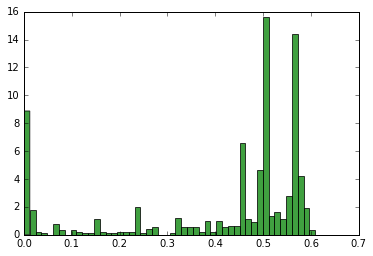

In [1]:
%matplotlib inline

# Leaderboard histogram on 13th June
# Target MAP@3 scores, 0.457-0.467, 0.506-0.517, 0.568-0.578
import matplotlib.pyplot as plt

f = open('histogram_leaderboard.txt', 'rb')
x = []
while True:
    try:
        x.append(float(f.next().strip()))
    except:
        break

n, bins, patches = plt.hist(x, 50, normed = 1, facecolor = 'green', alpha = 0.75)
plt.show()

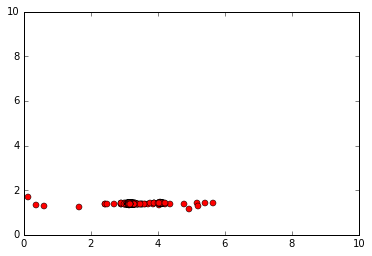

In [4]:
from scripts import helpers

helpers.plot_train_data('places/1623394281_2.csv')

In [5]:
import numpy as np

In [6]:
np.ravel?

In [7]:
np.ravel([1,2,3])

array([1, 2, 3])

In [8]:
a = np.ravel([1,2,3], [2,3,4])

In [9]:
a

array([1, 2, 3])